In [1]:
import pandas as pd
import numpy as np

pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', None)
pd.set_option('display.float_format',  '{:.2f}'.format)

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("arnabchaki/data-science-salaries-2023")

print("Path to dataset files:", path)

100%|██████████| 25.4k/25.4k [00:00<00:00, 489kB/s]

Extracting files...
Path to dataset files: C:\Users\uniat\.cache\kagglehub\datasets\arnabchaki\data-science-salaries-2023\versions\1


In [3]:
df = pd.read_csv(path+"//ds_salaries.csv")
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [13]:
df.reset_index(inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [5]:
def show_table(data, head=5):
    print("\n******Shape******")
    print(f'Shape     : {df.shape}\n'
          f'Size      : {df.size}\n' 
          f'Dimension : {df.ndim}')
    print("\n******Types******")
    print(data.dtypes)
    print("\n******Head******")
    print(data.head(head))
    print("\n******Tail******")
    print(data.tail(head))
    print("\n******Random Sampling******")
    print(data.sample(head))
    print("\n******Missing Values******")
    print(data.isnull().sum())
    print("\n******Duplicated Values******")
    print(data.duplicated().sum())
    print("\n******Unique Values******")
    print(data.nunique())
    print("\n******Describe******")
    print(data.describe().T)
    print("\n******Object Describe******")
    print(data.describe(include=['O']).T)

In [6]:
show_table(df)


******Shape******
Shape     : (3755, 11)
Size      : 41305
Dimension : 2

******Types******
work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

******Head******
   work_year experience_level employment_type                 job_title  salary salary_currency  salary_in_usd employee_residence  remote_ratio company_location company_size
0       2023               SE              FT  Principal Data Scientist   80000             EUR          85847                 ES           100               ES            L
1       2023               MI              CT               ML Engineer   30000             USD          30000                 US           100               US            S
2       2023               MI     

In [7]:
df.loc[df.duplicated(), :]

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
115,2023,SE,FT,Data Scientist,150000,USD,150000,US,0,US,M
123,2023,SE,FT,Analytics Engineer,289800,USD,289800,US,0,US,M
153,2023,MI,FT,Data Engineer,100000,USD,100000,US,100,US,M
154,2023,MI,FT,Data Engineer,70000,USD,70000,US,100,US,M
160,2023,SE,FT,Data Engineer,115000,USD,115000,US,0,US,M
...,...,...,...,...,...,...,...,...,...,...,...
3439,2022,MI,FT,Data Scientist,78000,USD,78000,US,100,US,M
3440,2022,SE,FT,Data Engineer,135000,USD,135000,US,100,US,M
3441,2022,SE,FT,Data Engineer,115000,USD,115000,US,100,US,M
3586,2021,MI,FT,Data Engineer,200000,USD,200000,US,100,US,L


In [8]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    cat_cols = [col for col in df.columns if str(df[col].dtypes) in ["category", "object", "bool"]]
    num_but_cat = [col for col in df.columns if df[col].nunique() < 10 and df[col].dtypes in ["int", "flaot"]]
    cat_but_car = [col for col in df.columns if df[col].nunique() > 20 and str(df[col].dtypes) in ["category", "object"]]
    cat_cols = [col for col in cat_cols if col not in cat_but_car]
    cat_cols = cat_cols + num_but_cat
    num_cols = [col for col in df.columns if df[col].dtypes in ["int", "float"]]
    num_cols = [col for col in num_cols if col not in cat_cols]
    
    print(f'Observations {dataframe.shape[0]}')
    print(f'Variables:  {dataframe.shape[1]}')
    print(f'cat_cols:  {len(cat_cols)}')
    print(f'num_cols:  {len(num_cols)}')
    print(f'cat_but_car:  {len(cat_but_car)}')
    print(f'num_but_cat:  {len(num_but_cat)}')
    
    return cat_cols, num_cols, cat_but_car

In [9]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations 3755
Variables:  11
cat_cols:  4
num_cols:  0
cat_but_car:  3
num_but_cat:  0


<a id="section-two"></a>
# **Data Visualization**

In [10]:
df['experience_level'] = df['experience_level'].replace(['EN', 'MI', 'SE', 'EX'], 
                                                        ['Entry-Level', 'Mid-Level', 'Senior-Level', 'Executive-Level'])
df['employment_type'] = df['employment_type'].replace(['PT', 'FT', 'FL', 'CT'], 
                                                      ['Part-Time', 'Full-Time', 'Freelance', 'Contract'])
df['remote_ratio'] = df['remote_ratio'].replace([0, 50, 100], 
                                                ['On-Site', 'Hybrid', 'Remote'])
df['company_size'] = df['company_size'].replace(['S', 'M', 'L'], 
                                                ['Small', 'Medium', 'Large'])

<a id="section-three"></a>
### **I. Top 10 Jobs For Each Work Year**

In [20]:
us_inflation_rates = {2019: 0.0181, 2020: 0.0123, 2021: 0.0470, 2022: 0.065}
global_inflation_rates = {2019: 0.0219, 2020: 0.0192, 2021: 0.0350, 2022: 0.088}
def adjust_salary(row):
    year = row['work_year']
    original_salary = row['salary_in_usd']
    currency = row['salary_currency']

    if year == 2023:
        return original_salary

    adjusted_salary = original_salary
    for y in range(year, 2023):
        if currency == 'USD':
            inflation_rate = us_inflation_rates[y]
        else:
            inflation_rate = global_inflation_rates[y]

        adjusted_salary *= (1 + inflation_rate)

    return adjusted_salary

# Apply the function to the dataset
df['adjusted_salary'] = df.apply(adjust_salary, axis=1)

In [28]:
from wordcloud import WordCloud
import nltk

def Freq_df(word_list):
    Freq_dist_nltk = nltk.FreqDist(word_list)
    df_freq = pd.DataFrame.from_dict(Freq_dist_nltk, orient = 'index')
    df_freq.columns = ['Frequency']
    df_freq.index.name = 'Term'
    df_freq = df_freq.sort_values(by = ['Frequency'], ascending = False)
    df_freq = df_freq.reset_index()
    return df_freq

def Word_Cloud(data, title):
    plt.figure(figsize = (20,15))
    wc = WordCloud(width = 1200, height = 600, max_words = 50,
               background_color = 'white',
               max_font_size = 100, random_state = 42)
    wc.generate_from_frequencies(data)
    
    plt.imshow(wc)
    plt.title(title)
    plt.axis('off')
    plt.show()

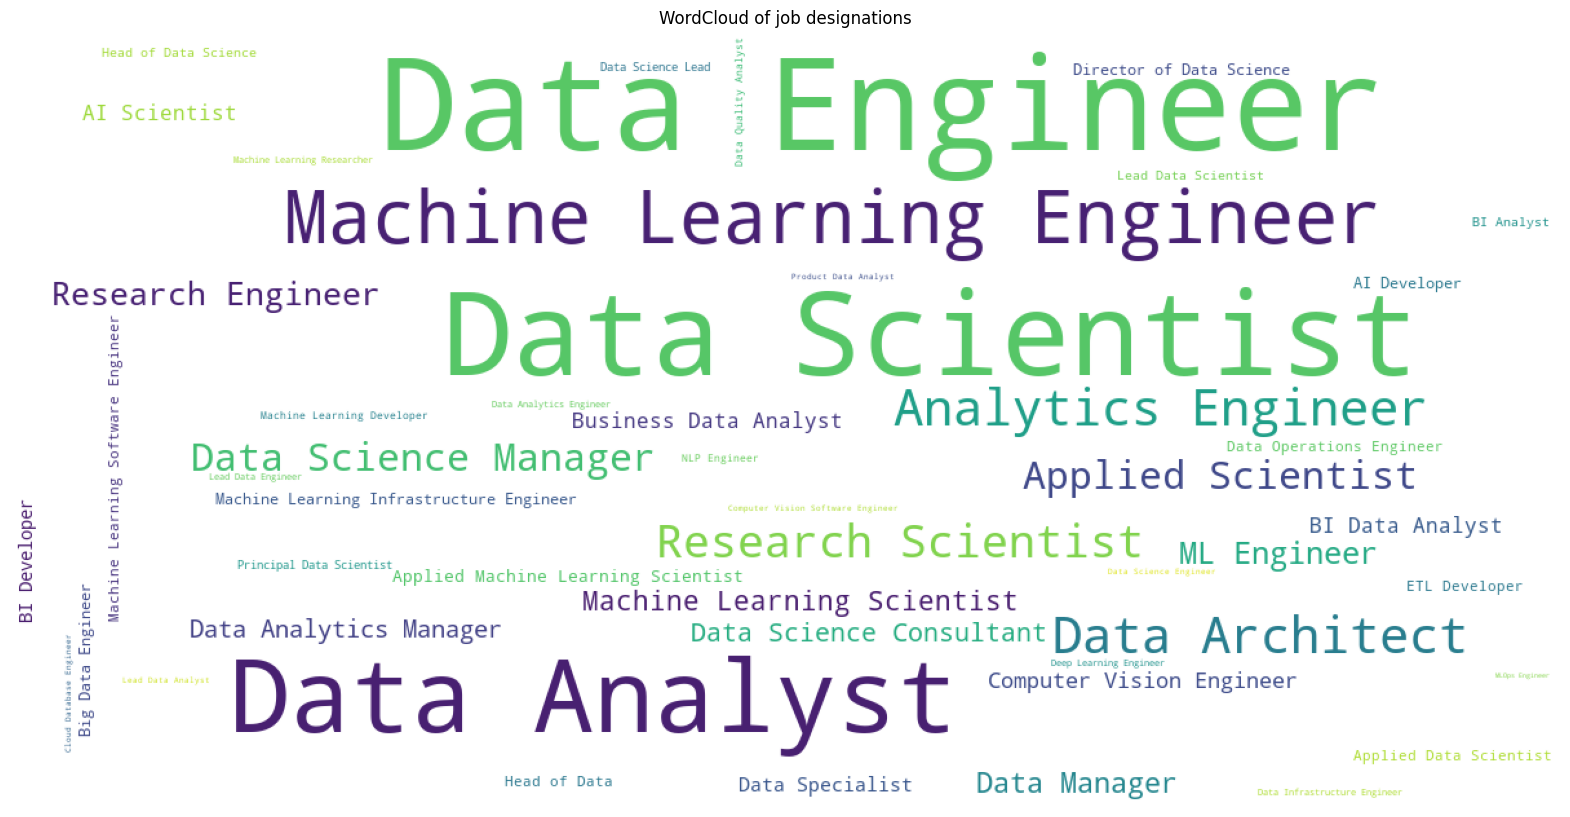

In [29]:
freq_df = Freq_df(df['job_title'].values.tolist())
data = dict(zip(freq_df['Term'].tolist(), freq_df['Frequency'].tolist()))
data = freq_df.set_index('Term').to_dict()['Frequency']

Word_Cloud(data , 'WordCloud of job designations')

<a id="section-four"></a>
### **II. Top 3 Jobs for Experience Level**

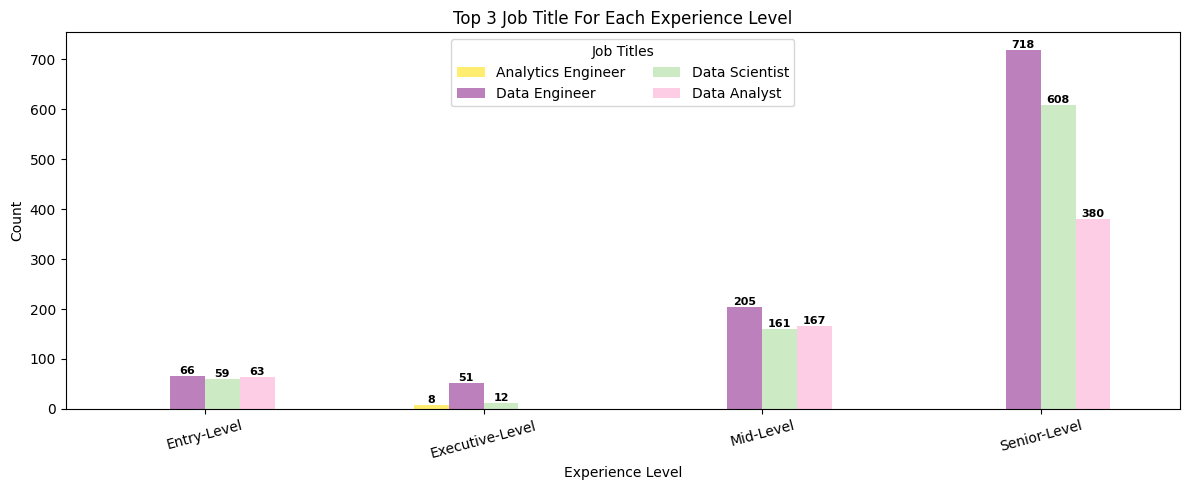

In [31]:
dft = df.groupby(['experience_level'])['job_title'].value_counts().groupby(level=0, group_keys=False).head(3)
label_order = ['Analytics Engineer', 'Data Engineer', 'Data Scientist', 'Data Analyst']

palette_set3 = sns.color_palette("Set3")
palette = sns.color_palette([palette_set3[11], palette_set3[9], palette_set3[10], palette_set3[7]])

ax = dft.unstack(level=1)[label_order].plot(kind= 'bar', 
                                            figsize = (12, 5),
                                            color=palette)
ax.legend(loc='upper center', ncol=2, title="Job Titles")

for i in ax.patches:    
    if i.get_height() != 0:
        ax.text(x = i.get_x() + i.get_width()/2, y = i.get_height()+10,
                s = int(i.get_height()), 
                ha = 'center', va='center', size = 8, weight = 'bold')
    
plt.title("Top 3 Job Title For Each Experience Level")
plt.xticks(rotation=15, horizontalalignment="center")
plt.ylabel("Count")
plt.xlabel("Experience Level")
plt.tight_layout()

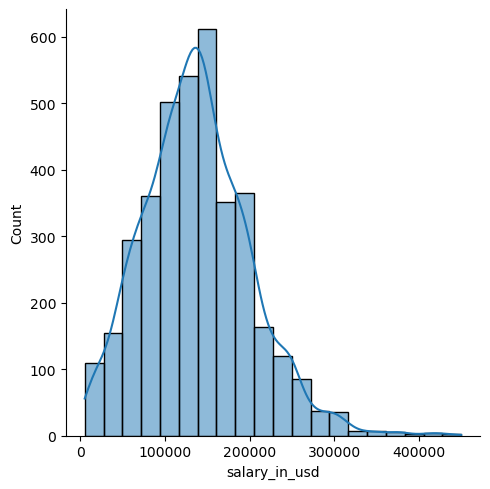

In [ ]:
sns.displot(data=df, x='salary_in_usd', kde=True, bins=20)

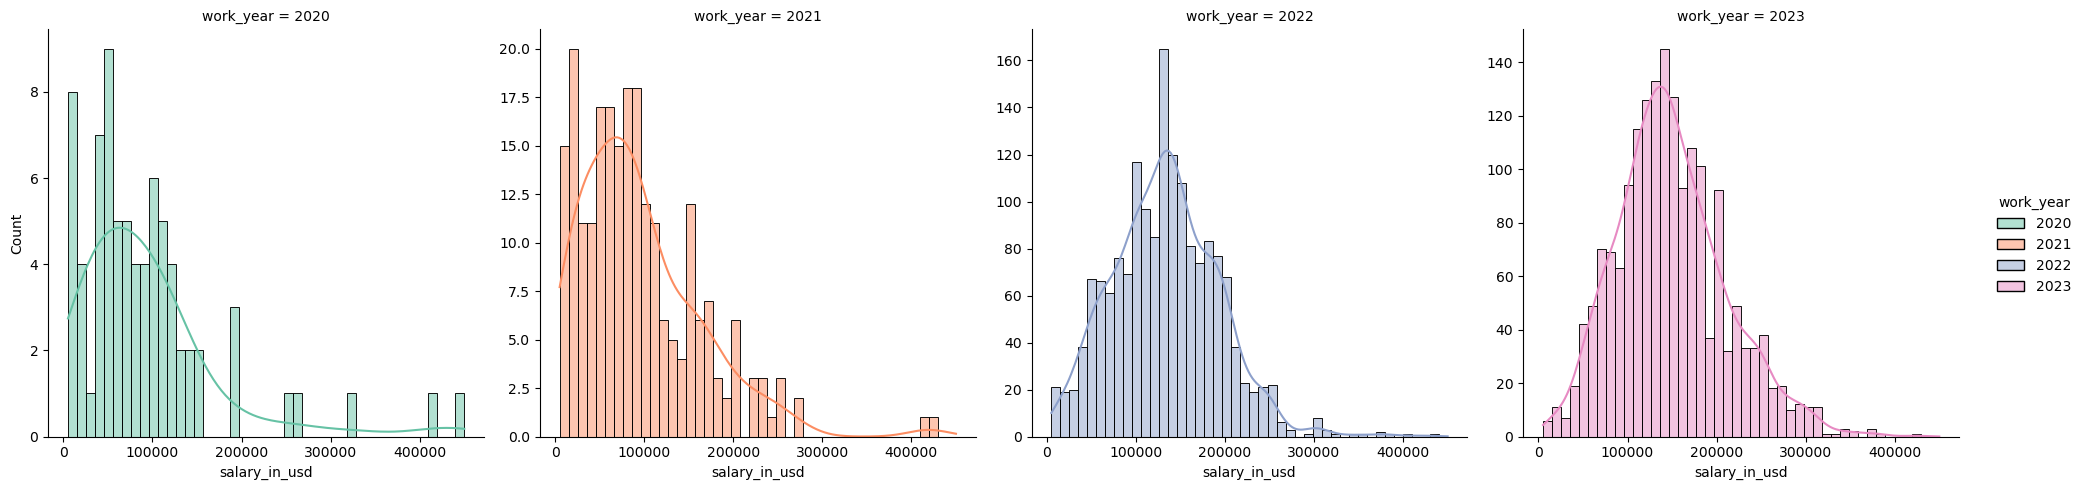

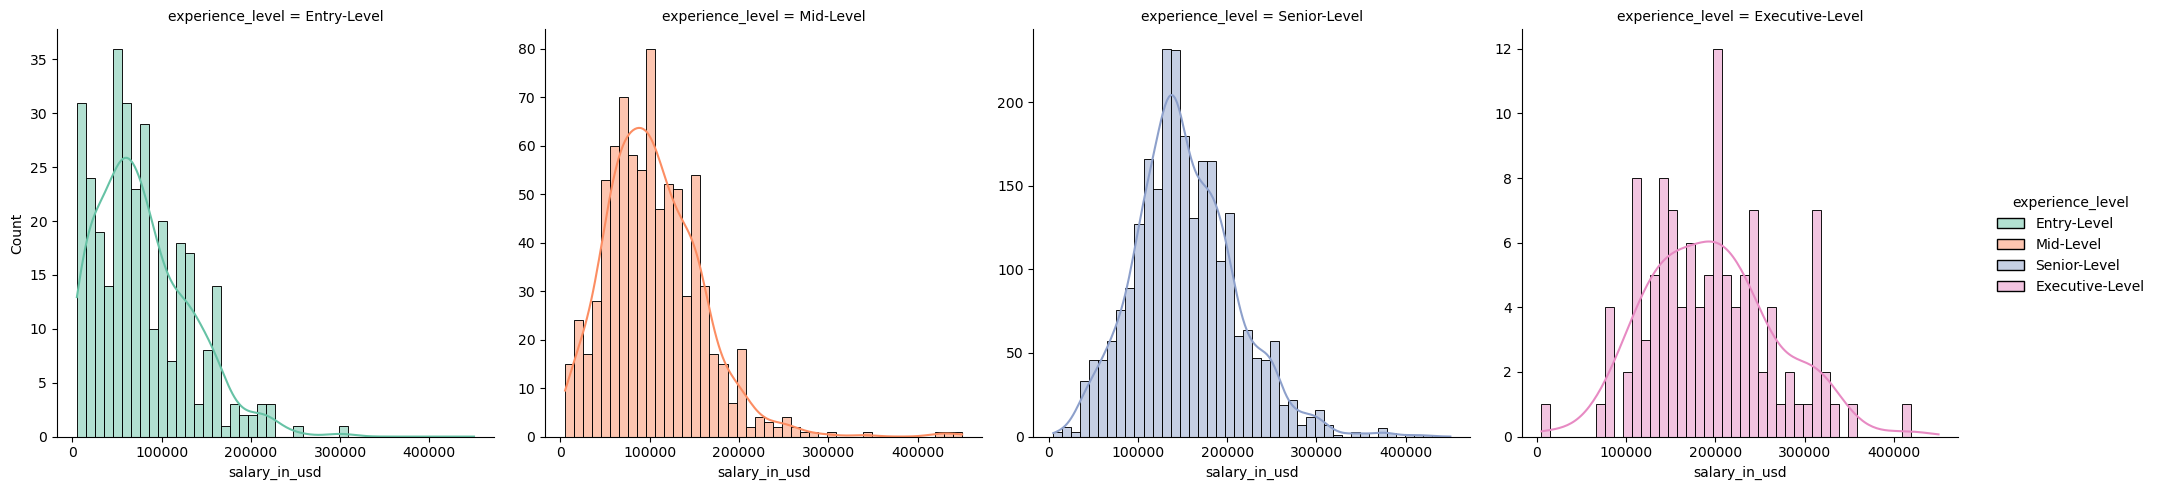

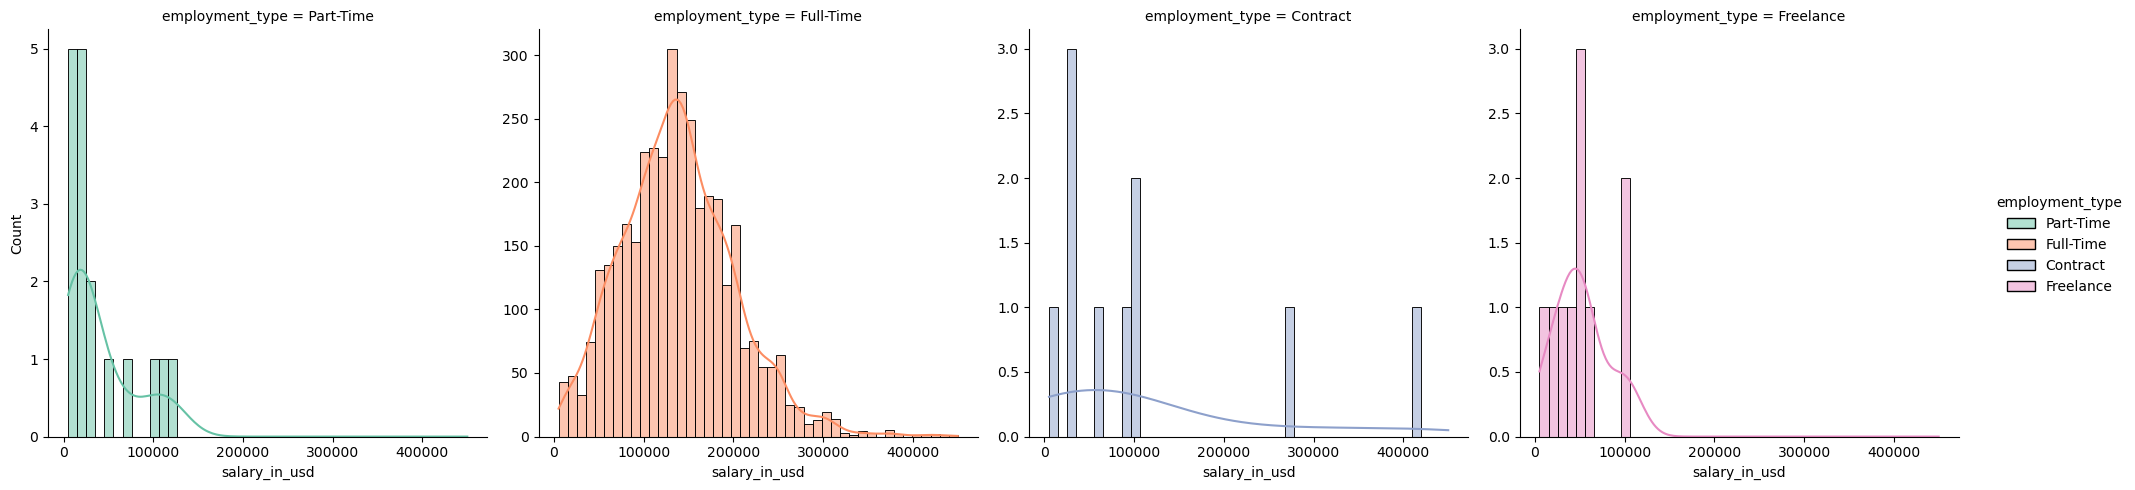

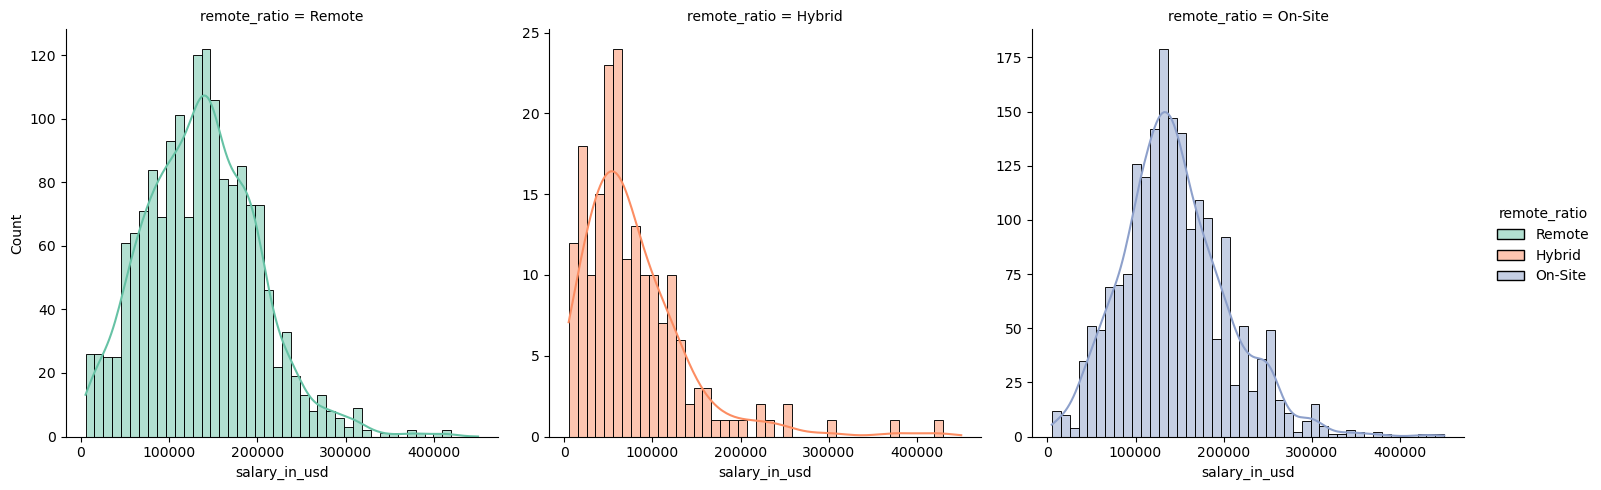

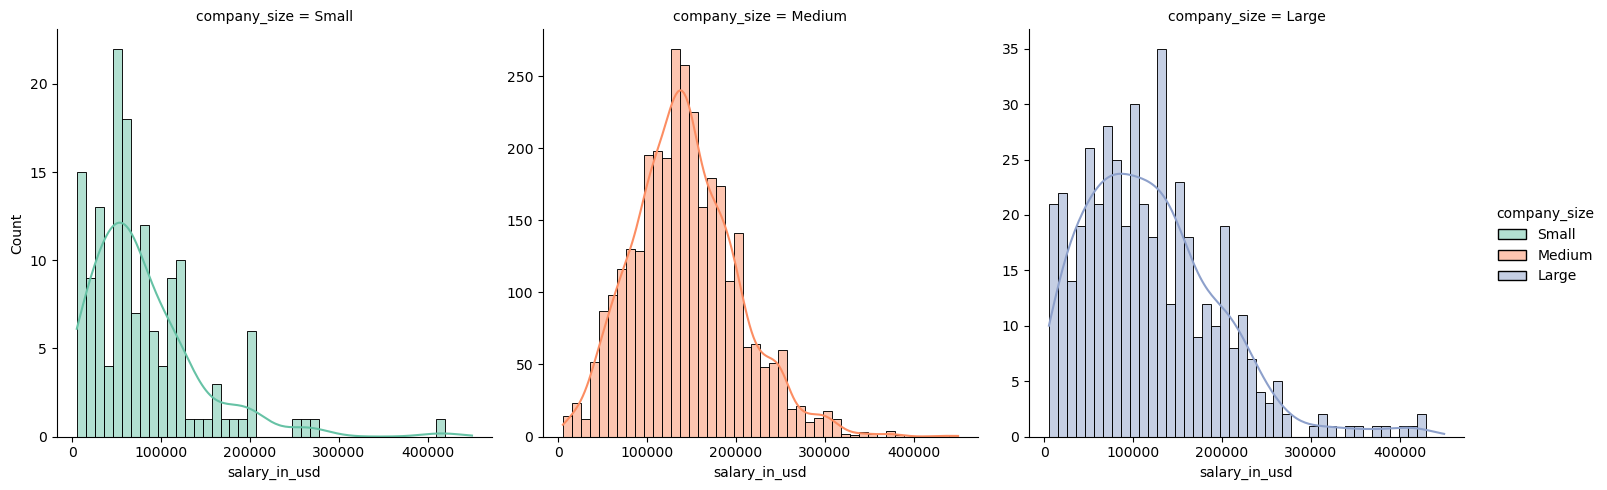

In [ ]:
hues_cols_orders = {'work_year': None, 
                    'experience_level': ['Entry-Level', 'Mid-Level', 'Senior-Level', 'Executive-Level'], 
                    'employment_type': ['Part-Time', 'Full-Time', 'Contract', 'Freelance'], 
                    'remote_ratio': ['Remote', 'Hybrid', 'On-Site'], 
                    'company_size': ['Small', 'Medium', 'Large']}

for hue_col,order in hues_cols_orders.items():
        dist = sns.displot(data=df, x='salary_in_usd', hue=hue_col, col=hue_col,
                           hue_order=order, col_order=order, palette='Set2',
                           kde=True, facet_kws={'sharey': False, 'sharex': False});

c:\Users\uniat\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\uniat\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\uniat\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

c:\Users\uniat\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a f

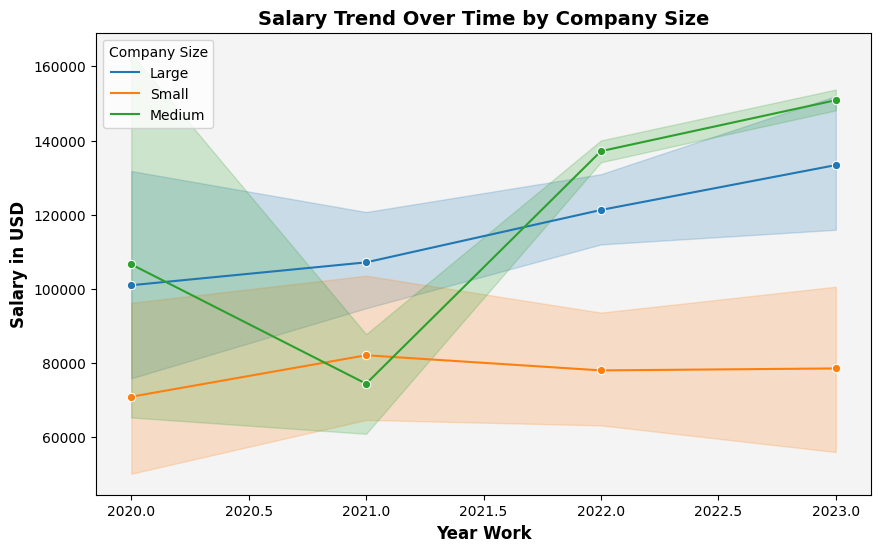

In [32]:
plt.figure(figsize=(10, 6))
p = sns.lineplot(data=df, x='work_year', y='salary_in_usd', hue='company_size', marker='o')

plt.xlabel('Year Work', fontsize=12, fontweight='bold')
plt.ylabel('Salary in USD', fontsize=12, fontweight='bold')

# Add a legend
plt.legend(title='Company Size', title_fontsize=10, fontsize=10, loc='upper left')

# Add a title
plt.title('Salary Trend Over Time by Company Size', fontsize=14, fontweight='bold')


# Customize the background color
p.set_facecolor("#f4f4f4")

# Remove the grid lines
p.grid(False)
plt.show()

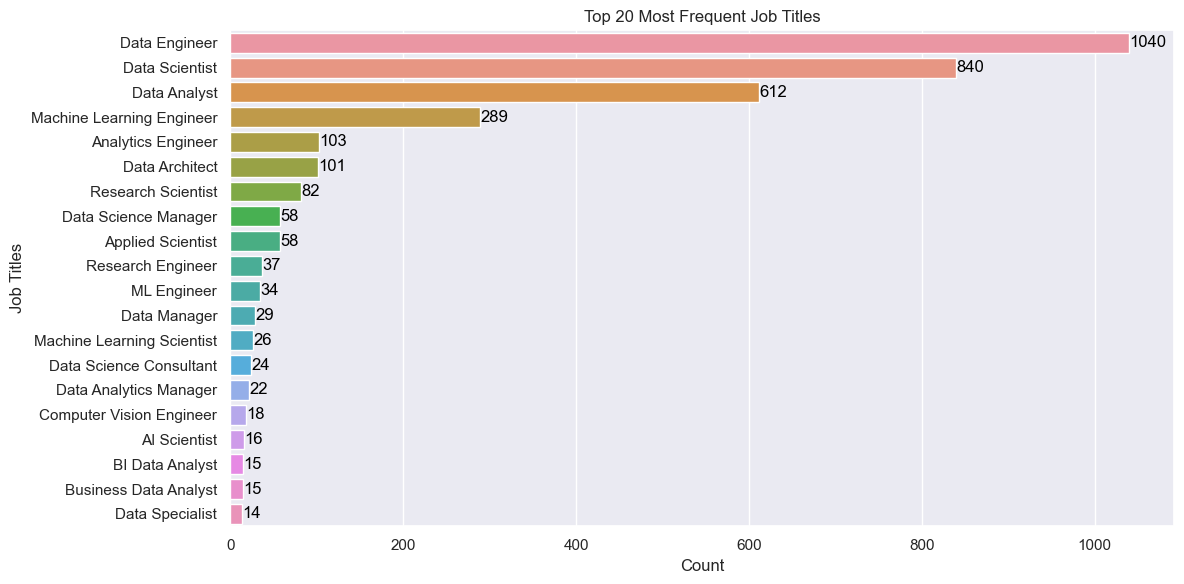

In [37]:
# Extract the "job title" column
job_titles = df['job_title']

# Calculate the frequency of each job title
title_counts = job_titles.value_counts()

# Extract the top 20 most frequent job titles
top_20_titles = title_counts.head(20)

# Create a DataFrame for the top 20 titles
top_20_df = pd.DataFrame({'Job Title': top_20_titles.index, 'Count': top_20_titles.values})

# Plotting the count plot
plt.figure(figsize=(12, 6))
sns.set(style="darkgrid")
ax = sns.barplot(data=top_20_df, x='Count', y='Job Title')
plt.xlabel('Count')
plt.ylabel('Job Titles')
plt.title('Top 20 Most Frequent Job Titles')

# Add count labels to the bars
for i, v in enumerate(top_20_df['Count']):
    ax.text(v + 0.2, i, str(v), color='black', va='center')

plt.tight_layout()
plt.show()